# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [40]:
# Python version used
import sys
print('Python version used: {}'.format(sys.version))

Python version used: 3.5.4 |Anaconda custom (x86_64)| (default, Aug 14 2017, 12:43:10) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


In [41]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data_full = data.copy()
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))

except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


In [42]:
# Showing some examples
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [43]:
# All features
data_full.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [44]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


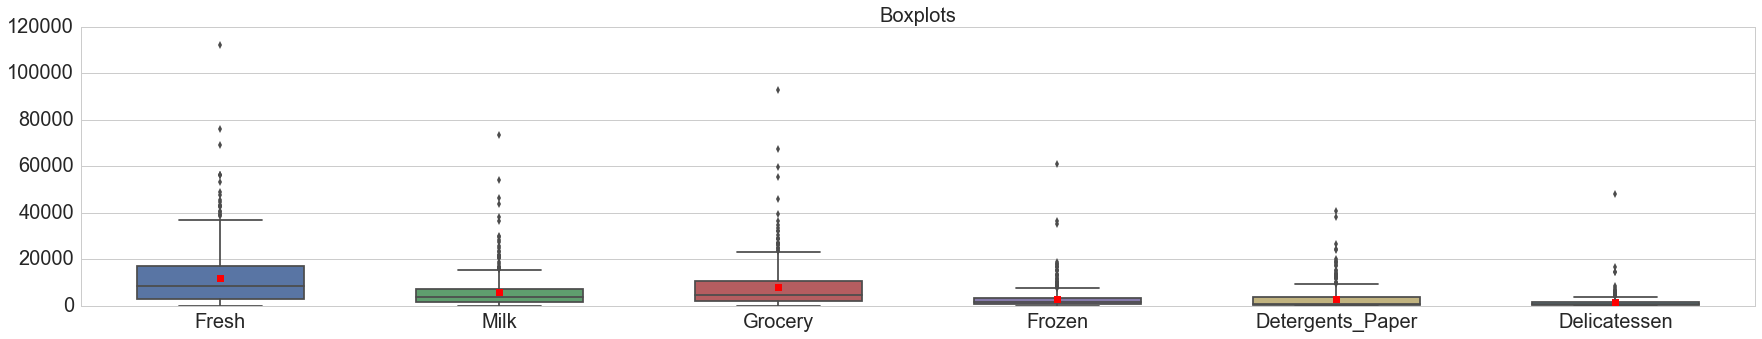

In [45]:
# A more visual representation of data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()

fig, ax = plt.subplots(figsize=(30,5))

sns.boxplot(ax=ax,data=data, width=0.6,showmeans=True).set_title('Boxplots',fontsize=20)
sns.set_style('whitegrid')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

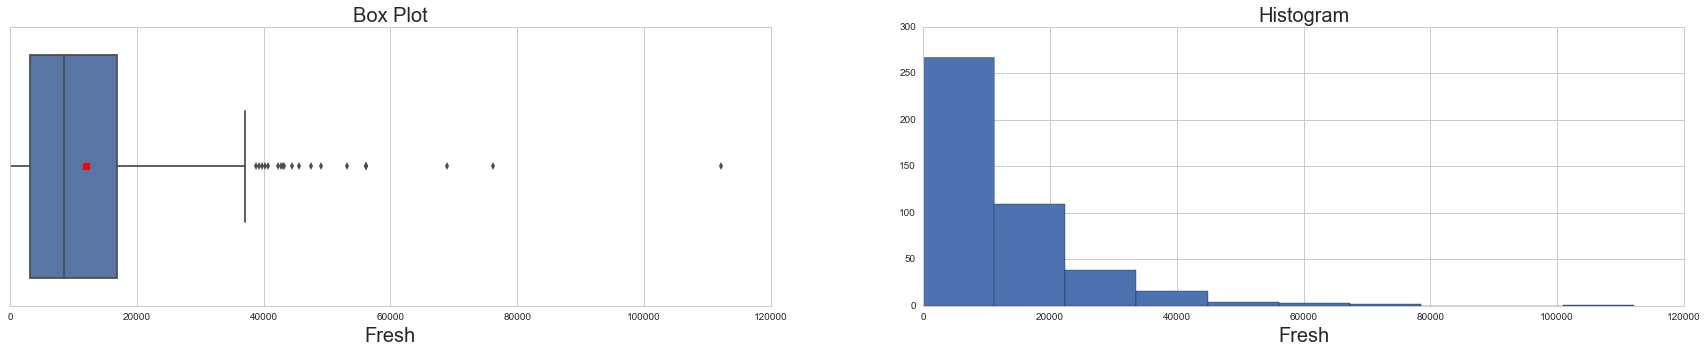

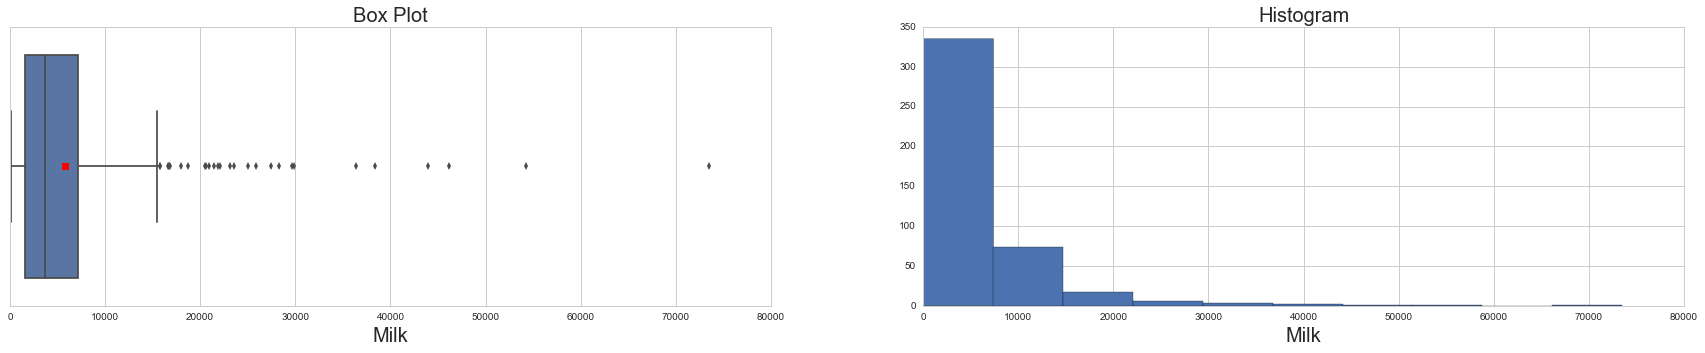

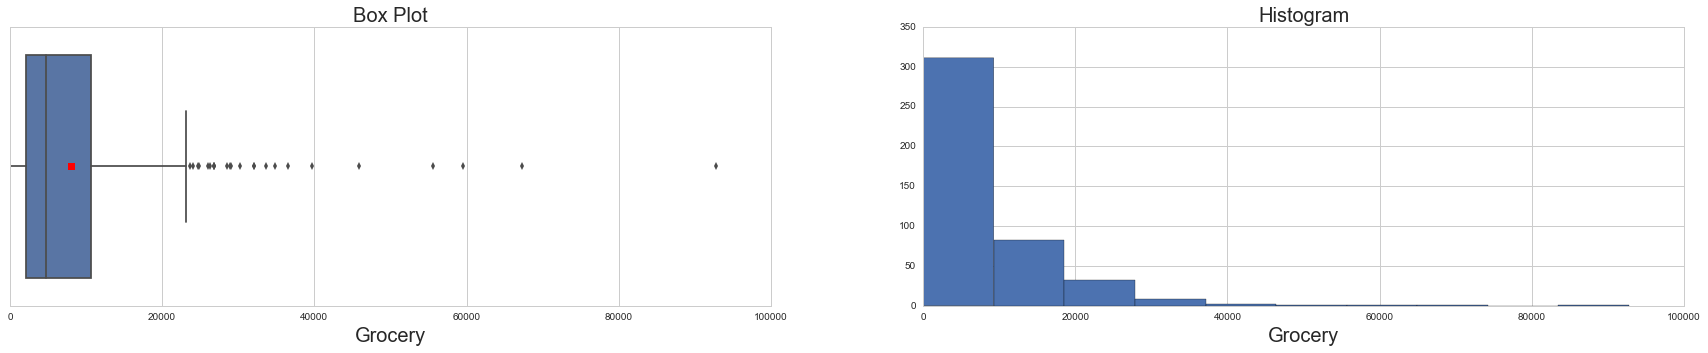

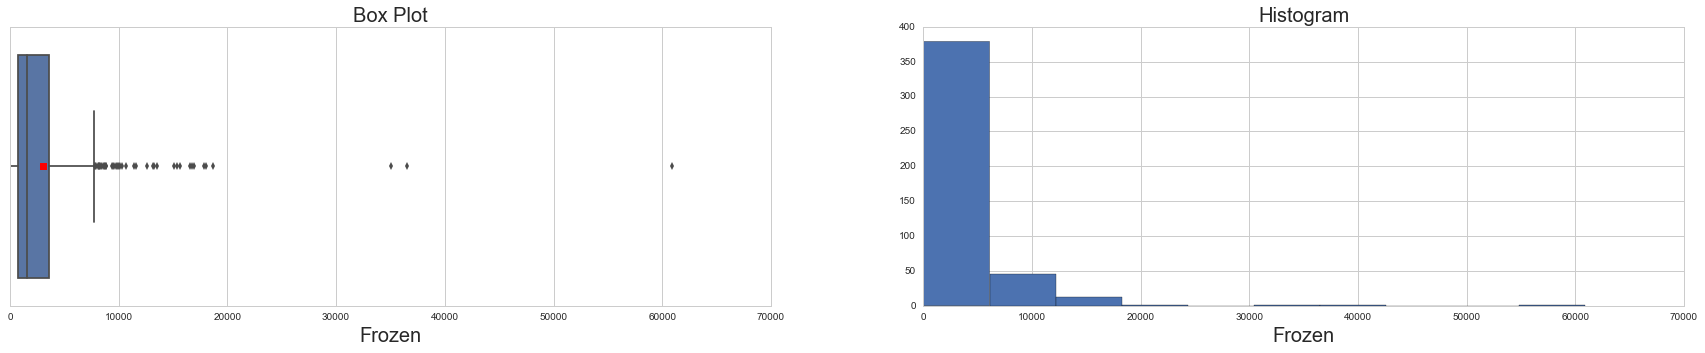

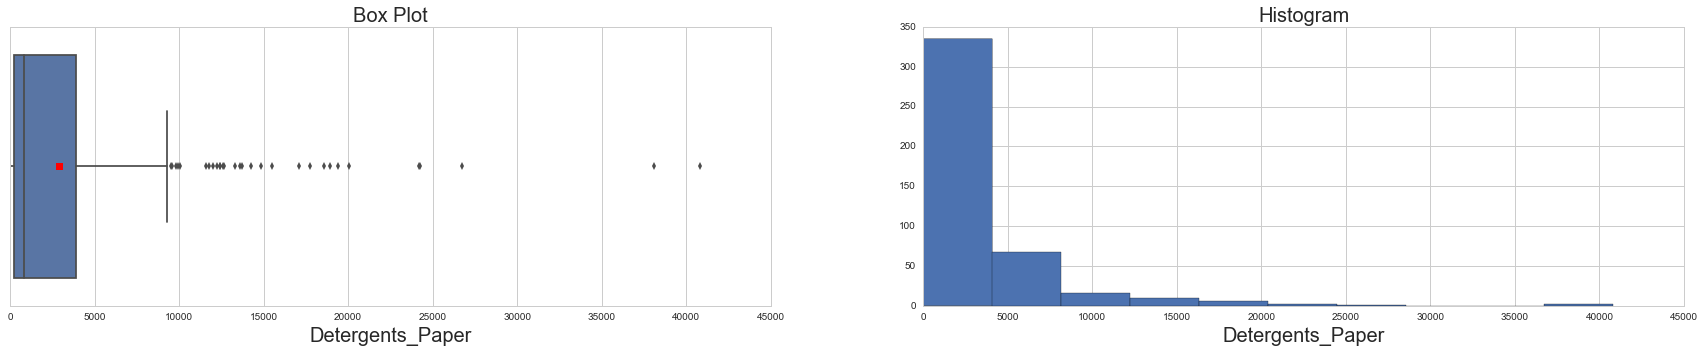

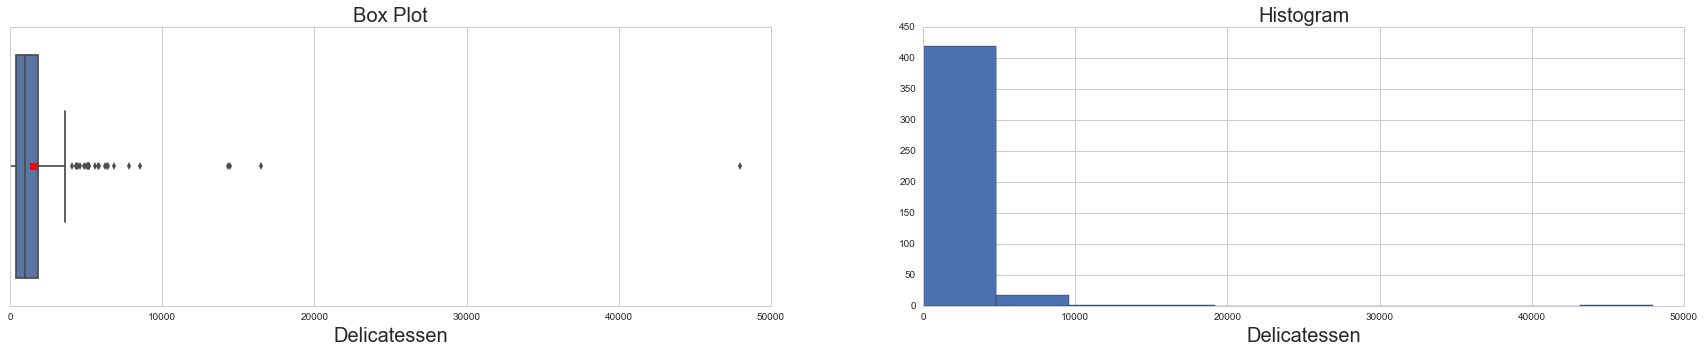

In [46]:
# Some plots
for feature in list(data.columns):
    plt.subplots(figsize=(30,5))

    # Boxplot, para visualização dos outliers
    plt.subplot(121)
    sns.boxplot(data[feature],showmeans=True)
    plt.xlabel(feature,fontsize=20)
    plt.title('Box Plot',fontsize=20)

    # Histograma dos dados
    plt.subplot(122)
    plt.hist(data[feature])
    plt.xlabel(feature,fontsize=20)
    plt.title('Histogram',fontsize=20)
    
    plt.show()

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [47]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [8,32,128]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5963,3648,6192,425,1716,750
1,21632,1318,2886,266,918,405
2,140,8847,3823,142,1062,3


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

### What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


#### Answer:

The boxplots above depict a relative large number of outliers, according to the tukey's method for outliers detection, so I believe the <b>medians</b> would be a better reference for this answer. The medians are more robust to the presence of outliers, as highlighted during the classes.

In [48]:
# Medians of features
print('Medians - 50% - Q2')
data.describe().loc['50%']

Medians - 50% - Q2


Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
Name: 50%, dtype: float64

The following tables help us to have a better visualization of the values:

##### Establishment 1

|     Features     |    Median     | Establishment 1  |
| ---------------- |:-------------:|:---------------:|
| Fresh            | 8504          | 5963            |
| Milk             | 3627          | 3648            |
| Grocery          | 4755          | 6192            |
| Frozen           | 1526          | 425             |
| Detergent_Paper  | 816.5         | 1716            |
| Delicatessen     | 965.5         | 750             |

Despite the low spend on frozen food, the establishment 1 has moderate spend on all items, so I believe the customer is a retailer.

##### Establishment 2

|     Features     |    Median     | Establishment 2  |
| ---------------- |:-------------:|:---------------:|
| Fresh            | 8504          | **21632**       |
| Milk             | 3627          | 1318            |
| Grocery          | 4755          | 2886            |
| Frozen           | 1526          | 266             |
| Detergent_Paper  | 816.5         | 918             |
| Delicatessen     | 965.5         | 405             |

As we have a high spend of fresh food in this case, I believe the core of this customer's business is associated to serve foods; It is probably a restaurant or related business.

##### Establishment 3

|     Features     |    Median     | Establishment 3  |
| ---------------- |:-------------:|:---------------:|
| Fresh            | 8504          | 140             |
| Milk             | 3627          | **8847**        |
| Grocery          | 4755          | **3823**        |
| Frozen           | 1526          | 142             |
| Detergent_Paper  | 816.5         | **1062**        |
| Delicatessen     | 965.5         | 3               |

In this establishment, we have low spend on fresh, frozen and deli food. However, the spend on milk is above the median and we have considerable numbers of grocery and Detergent_paper. I believe it could be a a grocery store. 

##### Suggestion by reviewer

As suggested, it would be interesting to use the quartiles to get a better idea of the nature of the establishments presented.

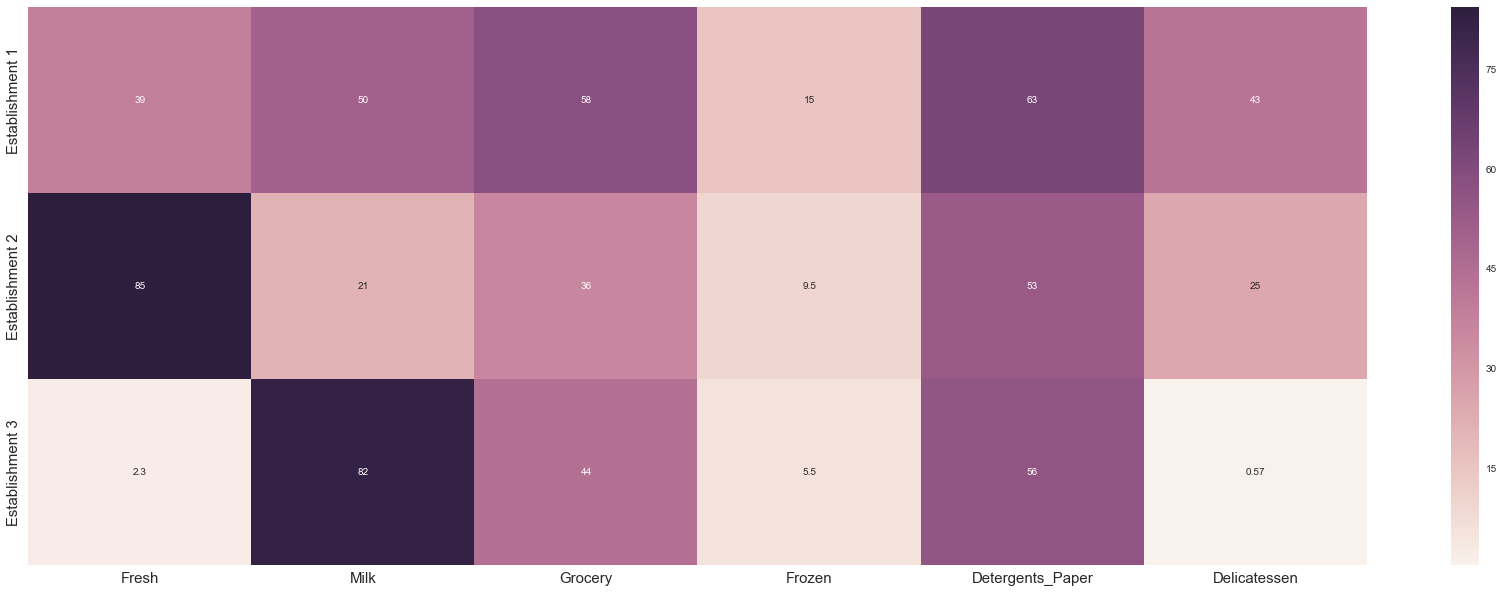

In [49]:
# Establishments using quartiles
percentiles_data = 100 * data.rank(pct=True)
percentiles_samples = percentiles_data.iloc[indices]

plt.figure(figsize=(30,10))
ax = sns.heatmap(percentiles_samples, annot=True, yticklabels=['Establishment 1','Establishment 2','Establishment 3'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

The quantile heatmap above corroborates the informations discussed before: 
 - The establishment 1 has a moderate spend on each item, despite the frozen value;
 - The establishment 2 has a high spend on fresh food, represented by the quantile (85% of data);
 - The establishment 3 has a moderate spend on milk, grocery and detergent paper, however the spends on fresh, frozen and deli are low. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.model_selection.train_test_split` to split the dataset into training and testing sets.
 - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [50]:
# Different approach in order to analyze each feature
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals import joblib

# List of features
features = list(data.columns)
print('Verification of R^2 score\n')

for feature in features:

    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(feature,axis=1)
    target = data[feature]
    
    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=0)
    
    # TODO: Create a decision tree regressor and fit it to the training set
    # Set a random state.
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Report the score of the prediction using the testing set
    regressor.fit(X_train,y_train)
    pred = regressor.predict(X_test)
    score = regressor.score(X_test,y_test)
    print('For feature {} - score = {}'.format(feature,score))

Verification of R^2 score

For feature Fresh - score = -0.2524698076882732
For feature Milk - score = 0.36572529273630905
For feature Grocery - score = 0.6028019788784589
For feature Frozen - score = 0.2539734466970086
For feature Detergents_Paper - score = 0.7286551812541454
For feature Delicatessen - score = -11.663687159428036


In [51]:
# Following a suggestion from reviwers: running many iteractions and averaging the scores
print('Verification of average R^2 score\n')

# number of iteractions we are going to run
iteractions = 100

# Store each array of scores, for further analysis
score_dict = {}

for feature in features:
    
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(feature,axis=1)
    target = data[feature]
    
    feature_r2_score = []
    
    for round in range(0,iteractions):
 
        # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
        X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=np.random.randint(1,1000000 + 1))

        # TODO: Create a decision tree regressor and fit it to the training set
        regressor = DecisionTreeRegressor(random_state=0)

        # TODO: Report the score of the prediction using the testing set
        regressor.fit(X_train,y_train)
        pred = regressor.predict(X_test)
        feature_r2_score.append(regressor.score(X_test,y_test))
        
    score_dict[feature] = feature_r2_score
    print('For feature {} - score = {}'.format(feature,np.mean(feature_r2_score)))

Verification of average R^2 score

For feature Fresh - score = -0.7134135413055112
For feature Milk - score = 0.1611296437589406
For feature Grocery - score = 0.667700321557904
For feature Frozen - score = -1.3293430939963449
For feature Detergents_Paper - score = 0.6908938892452321
For feature Delicatessen - score = -2.92323334560133


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to believe that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

### Answer:

#### Which feature did you attempt to predict?
  
  As we can see above, I run a classifier for each feature in order to check their $R^{2}$ coefficients. We can say the <i> Detergents_Paper </i> and <i> Grocery </i>  are well correlated to the other features. These features do not provide a significative gain of information. We can analyze the correlation between the features, using a correlation matrix.

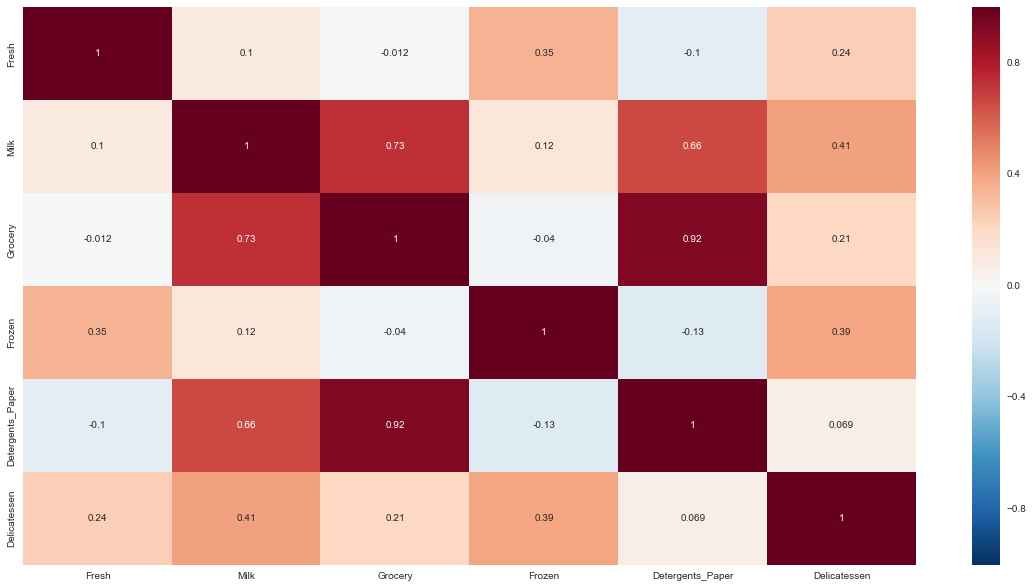

In [52]:
# Checking the correlation between variables
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

Looking at the correlation matrix above, one can see the most correlated features have the highest $R^2$ coefficients. According to the hint given, we are looking for features which lead us to bad $R^2$ coefficients. Having said that, the best feature to identify customers' spending habits is the feature delicatessen.

##### Average scores

The average scores give us more information about the $R^2$ scores:

|    Features       |    $R^2$ Scores             | Average of $R^2$ Scores |
| ----------------- |:---------------------------:|:-----------------------:|
| Fresh             | -0.2524698076882732         | -0.7670023570856503     |
| Milk              |  0.36572529273630905        |  0.0983882033328743     |
| Grocery           |  0.6028019788784589         |  0.6480042416321932     |
| Frozen            |  0.2539734466970086         | -1.1483983234067683     |
| Detergent_Paper   |  0.7286551812541454         |  0.6763780832749916     |
| Delicatessen      | -11.663687159428036         | -3.1596151341936500     |


After analyzing the values we got from the average scores, one can conclude some statements:

 - Although the $R^2$ score for predicting the <i>milk</i> feature, this feature has a low average $R^2$ score, then one can conclude this feature is not well predictable, despite the correlation between grocery feature and detergent_paper feature.
 
 - The features <i>Detergent_paper</i> and <i>Grocery</i> have high $R^2$ score in both columns, besides the fact that both features are strongly correlated. 

> The coefficient of determination, R^2, is scored between 0 and 1, with 1 being a perfect fit. A negative R^2 implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to believe that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

The features <i>Grocery</i> and <i>Detergent_paper</i> are very predictable; We could delete one of them from our model.

#### What was the reported prediction score?
  Before running the code above, I have thought the detergent_paper would give us information about the customer (in my head, a high consumption of detergent paper would inform it is probably a restaurant). Considering that, the prediction score($R^2$) was about 0.677
  
#### Is this feature necessary for identifying customers' spending habits?<br>
  Since the model for prediction of detergent_paper has a $R^2$ score of about 0.68, we can say this feature is not good for identifying customers' spending habits, as we are looking for relevant features.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

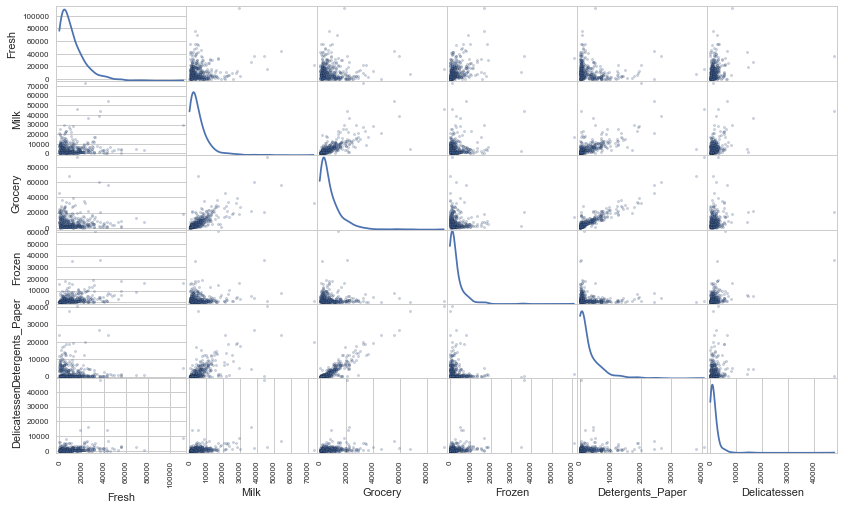

In [53]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

### Answer

####  Discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.

The visual check of the scatter matrix show us the data is skewed. From the plots, we can easily identify data points far from 0 (maybe outliers) and large number of data points around 0. The fact of large amount of data points being near 0 indicate that different types of customers are not defined by outliers.

#### Are there any pairs of features which exhibit some degree of correlation?

1 - The features <i>Grocery</i> and <i>Detergent_Paper</i> have a strong correlation of 0.92. We can see on the scatter matrix the shape of data showing us that there is a relevant (linear) correlation between the variables (a line).

2 - The features <i>Grocery</i> and <i>Milk</i> have a strong correlation of 0.73. 

3 - The features <i>Milk</i> and <i>Detergent_Paper</i> have a correlation of 0.66.

#### Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict?

The scatter matrix and the heatmap above confirmed my suspicions about the feature <i>Detergent_papers</i> after getting the $R^2$ score. This feature is not suitable for prediction of customers' spending habits. According to the heatmap and scatter matrix, 2 of the features are highly correlated, resulting in a high $R^2$ coefficient. The features <i>Detergent_papers</i> and <i>Grocery</i> are bad choices to include in our prediction model.

#### How is the data for those features distributed?

As I mentioned above, three features have a strong correlation with each other: <i>Grocery</i>, <i>Detergent_Paper</i> and <i>Milk</i>.

#### How data is distributed

One can visually check the data distribution. It is right-skewed as we can see.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

In [54]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

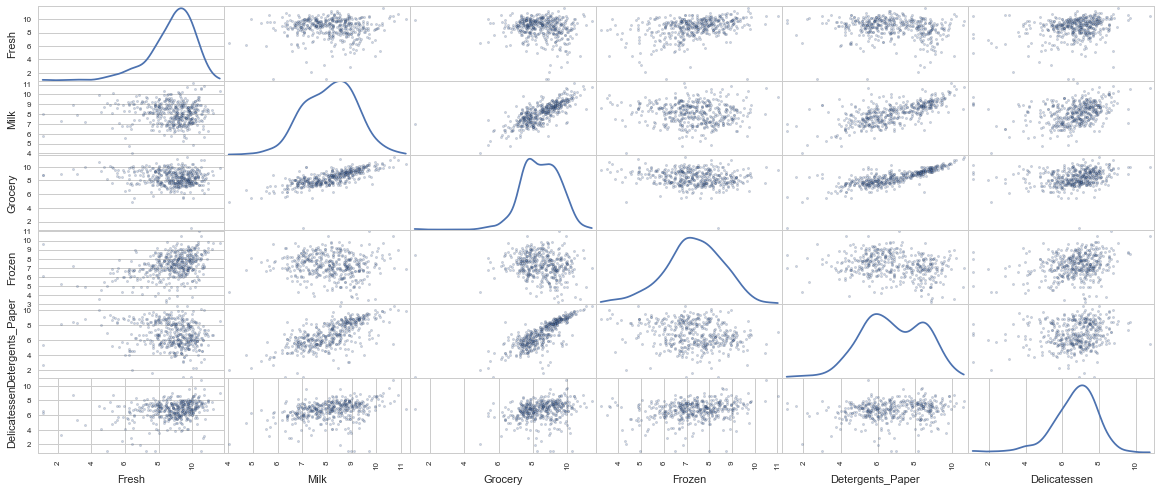

In [55]:
# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (20,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [56]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.693329,8.201934,8.731013,6.052089,7.447751,6.620073
1,9.981929,7.183871,7.967627,5.583496,6.822197,6.003887
2,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612


In [57]:
# Statistics of new data
log_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

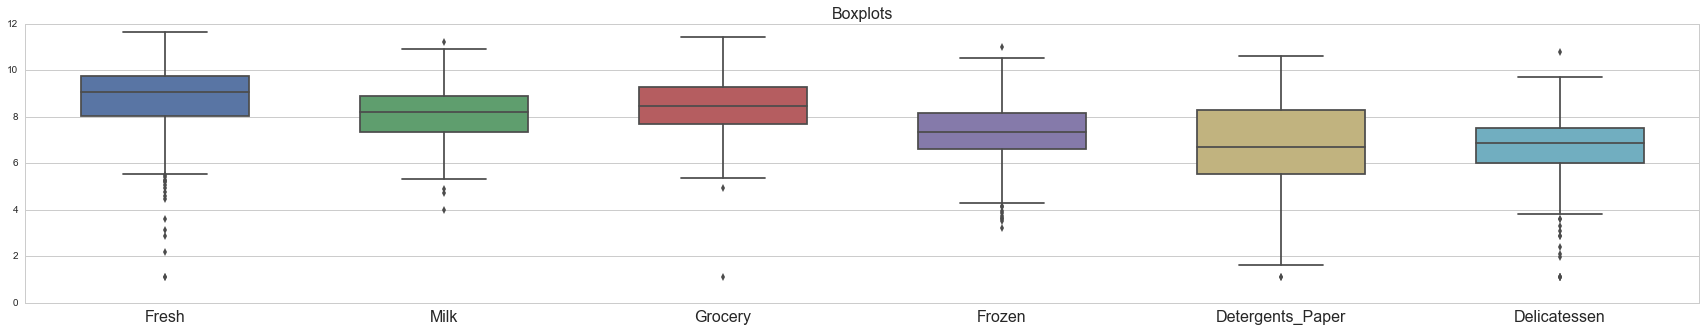

In [58]:
# Outliers Visualization using boxplot graph
plt.figure(1)
fig, ax = plt.subplots(figsize=(30,5))
sns.boxplot(ax=ax,data=log_data, width=0.6).set_title('Boxplots',fontsize=16)
sns.set_style('whitegrid')
plt.xticks(fontsize=16)
plt.show()

This representation of data is, indeed, different from the previous one (of course, it was expected).

In [59]:
# For each feature find the data points with extreme high or low values

outliers_index = {}

# do not change the original data; 
good_data = log_data

for feature in list(log_data.columns):
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = good_data[feature].quantile(0.25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = good_data[feature].quantile(0.75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    IQR = (Q3 - Q1)
    
    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    outlier = good_data[(good_data[feature] <= (Q1 - 1.5 * IQR)) | (good_data[feature] >= Q3 + 1.5 * IQR)].index.tolist()
    print(outlier)
    print()
    
    for index in outlier:
        if index in outliers_index:
            outliers_index[index] += 1
        else:
            outliers_index[index] = 1

Data points considered outliers for the feature 'Fresh':
[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412]

Data points considered outliers for the feature 'Milk':
[86, 98, 154, 356]

Data points considered outliers for the feature 'Grocery':
[75, 154]

Data points considered outliers for the feature 'Frozen':
[38, 57, 65, 145, 175, 264, 325, 420, 429, 439]

Data points considered outliers for the feature 'Detergents_Paper':
[75, 161]

Data points considered outliers for the feature 'Delicatessen':
[66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]



### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

#### Are there any data points considered outliers for more than one feature based on the definition above?

Verifying if there are data points considered outliers for more than one feature:

In [60]:
# Considering the outliers dictionary created before:

# List of points considered outliers
repeated_index = []

print('Data points considered outliers for more than one feature')
for key, value in outliers_index.items():
    if value > 1:
        print('Index:{}\tConsidered outlier in {} features'.format(key,value))
        repeated_index.append(key)

Data points considered outliers for more than one feature
Index:128	Considered outlier in 2 features
Index:65	Considered outlier in 2 features
Index:66	Considered outlier in 2 features
Index:75	Considered outlier in 2 features
Index:154	Considered outlier in 3 features


According to the answer above: yes, we have some points considered outliers for more than one feature.

#### Should these data points be removed from dataset?
These outliers could indicate big players in the market. I believe that these examples were not wrong labeled; they really have big expense at the type of products we are dealing, however they don't represent the general customers, thus I believe they should be removed.

#### If any data points were added to the outliers list to be remove, explain why

The points removed were outliers for more than one feature. As said before, these outliers do not represent the general customers, and they will affect the clustering algorithms' performance.

#### Asked by the reviewer

- Could you please be a little more specific in your justification for outlier removal? In particular, what do you expect to gain from outlier removal in the context of clustering?

We should remove outliers from our data in order to  , since clustering algorithms(K-Means, as example) is sensitive to outliers. Removing them from our data improves the efficiency of the clustering task. Using K-Means(example) after removing outliers, the clusters' means will be closer to the high-dimensional clusters, leading to a lower intra-cluster distance.

- And why not remove all the Tukey outliers, instead of a smaller subset?

In my point of view, the outlier analysis proposed does not provide any discussion about high-dimensional space, since the tukey's method is used on a univariate context. I believe that if a point is an outlier in more than one feature, the greater are the chances of this point being an outlier in a high-dimensional space.

In [61]:
good_data = log_data.drop(list(repeated_index))

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

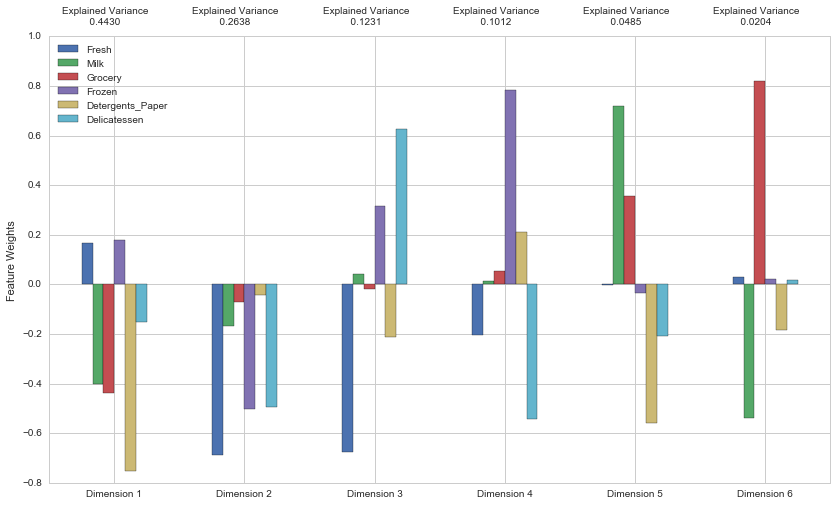

In [109]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA()

# TODO: Transform log_samples using the PCA fit above
pca.fit(good_data)
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

In [63]:
display(pca_results)

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092
Dimension 6,0.0204,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197


In [64]:
# Verifying how much variance for each component
cum = np.cumsum(pca.explained_variance_ratio_)

for component, var in enumerate(pca_results['Explained Variance'].cumsum()):
    print('Principal Component: {}, Cummulative: {:.4f}'.format(component + 1,var))

Principal Component: 1, Cummulative: 0.4430
Principal Component: 2, Cummulative: 0.7068
Principal Component: 3, Cummulative: 0.8299
Principal Component: 4, Cummulative: 0.9311
Principal Component: 5, Cummulative: 0.9796
Principal Component: 6, Cummulative: 1.0000


#### How much variance in the data is explained in total by the first and second principal component?

The first and second principal components explain about 70.7 % of data together.

- First principal component: 0.4430
- Second principal component: 0.2638

#### How much variance in the data is explained by the first four principal components?

About 93.18% of the data is explained by the first four principal components.

- Third principal component: 0.1231
- Fourth principal component: 0.1012

The first four principal components explain 93.11% of the data.

#### Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

- ** First Principal Component **

The first principal component has high Detergent_paper, Milk and Grocery weights, while frozen and fresh weights are lower. This component could indicate grocery stores and retailers.

- ** Second Principal Component **

The second principal component has high weights on fresh, frozen and deli features. This component, in my point of view, represents restaurants.

- ** Third Principal Component **

The third principal component has high weights on fresh (but negative), frozen and deli features. Again, this feature could represent restaurant segments.

- ** Fourth Principal Component **

Finally, the fourth principal component has high weights on frozen and deli features. This component could represent a retailer or a deli shop.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [65]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.8636,0.6650,-0.5376,-0.7922,-0.1551,0.0344
1,0.5743,0.5709,-1.8390,-1.2760,-0.6685,0.0878
2,-0.6435,6.4218,-1.6655,1.9916,1.7796,-0.9933


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [66]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [67]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.8636,0.6650
1,0.5743,0.5709
2,-0.6435,6.4218


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

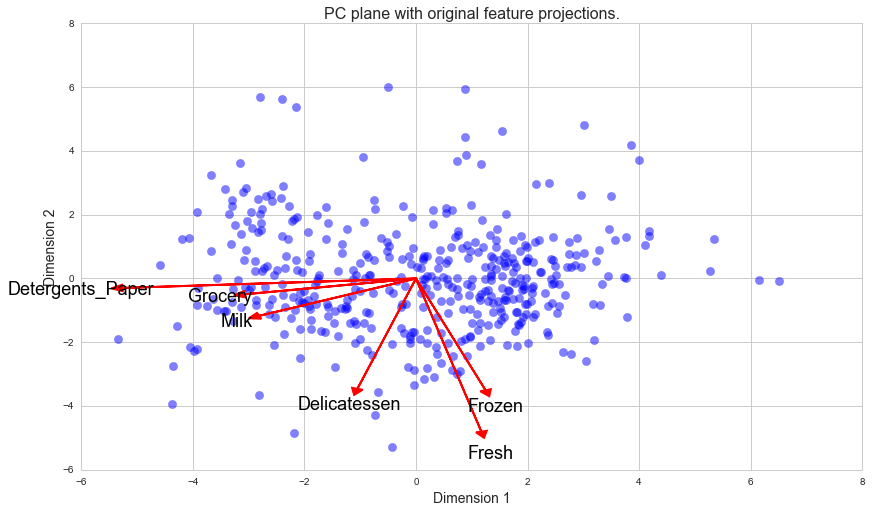

In [68]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)
plt.show()

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

#### From the biplot, which of the original features are most strongly correlated with the first component?

From the biplot, we can state that the features <i>Detergent_Paper</i>, <i>Grocery</i> and <i>Milk</i> are mostly strongly correlated with the first component.

#### What about those that are associated with the second component?

The features associated with the second component are <i>Delicatesse</i>, <i>Frozen</i> and <i>Fresh</i>.

#### Do these observations agree with the pca_results plot you obtained earlier?

Yes, the observations agree with the pca_results from the plot above. In the first dimension of PCA, we have negative weights for the features <i>Detergent_Paper</i>, <i>Grocery</i> and <i>Milk</i>, and in the second dimension of PCA we have negative weights for <i>Delicatesse</i>, <i>Frozen</i> and <i>Fresh</i> features. These informations are explicit visible in the biplot, where data points located on left side of the plot represents customers that spends more with Milk, Detergent Papers and Grocerey, and the points located in the center and below tend to spend more on Deli, Fresh and Frozen products.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

#### Clustering algorithms

#### What are the advantages to using a K-Means clustering algorithm? 

- K-means is a special case of the <i>expectation-maximization algorithm</i>, where we do not assume the distribution of data a priori. Since we do not assume the distribution, we have no other parameters to ajust than the number of possible clusters as the hyperparameter of the algorithm. 

- K-means is very fast(according to scikit-learn, one of the fastest algorithm implemented avaiable).

#### What are the advantages to using a Gaussian Mixture Model clustering algorithm? 

- GMM is a soft clustering algorithm, where we accept a probability of a sample to belong to more than one group.

#### Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

In this project we intend to apply unsupervised learning techniques to identify customers segments. Using the idea of hard clustering, we are going to divide the customers in only one segment, what could be wrong, since the customers can operate in more than one segment. Having said that, a soft or fuzzy clustering approach in this problem would be a better option. Following this thought, we should consider the use of the gaussian mixture model algorithm, which is more appropriate in this case.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [69]:
from sklearn.mixture import GaussianMixture as GMM
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 

silhouette_scores = []

for n_clusters in range(2,15):
    clusterer = GMM(n_components=n_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    
    silhouette_scores.append(score)

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

#### Report the silhouette score for several cluster numbers you tried

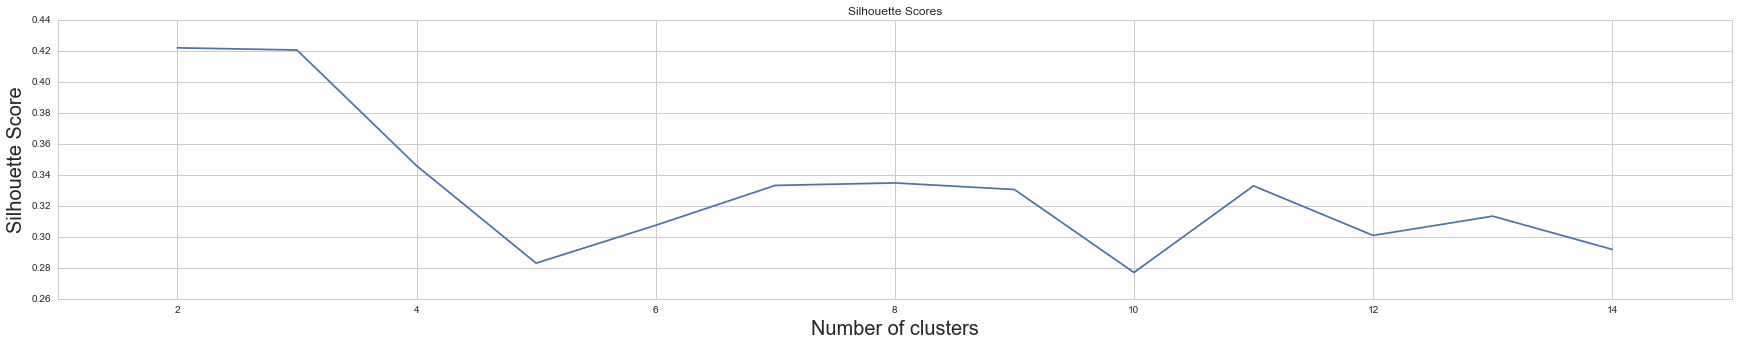

In [70]:
# Silhouette score plot
plt.figure(figsize=(30,5))
plt.plot(list(range(2,15)),silhouette_scores)
plt.xlim(1,15)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('Silhouette Score',fontsize=20)
plt.title('Silhouette Scores')
plt.show()

#### Of these, which number of clusters has the best silhouette score?

A Silhouette score close to one means that the data is appropriately clustered[[1]](https://en.wikipedia.org/wiki/Silhouette_(clustering). Using the graph above, the number os clusters with best score is k = 2, with a score of ~ 0.42.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [71]:
# Before plotting
clusterer = GMM(n_components=2).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data,preds)

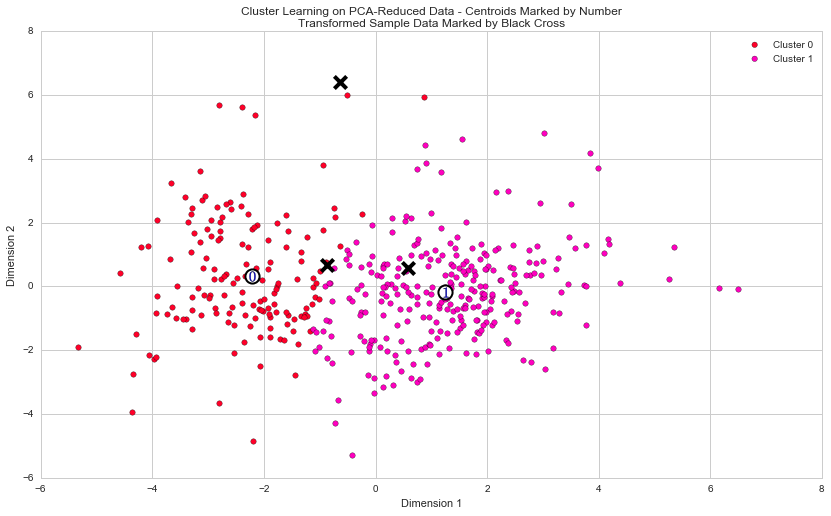

In [72]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [73]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3552.0,7837.0,12219.0,870.0,4696.0,962.0
Segment 1,8953.0,2114.0,2765.0,2075.0,353.0,732.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

#### What set of establishments could each of the customer segments represent?

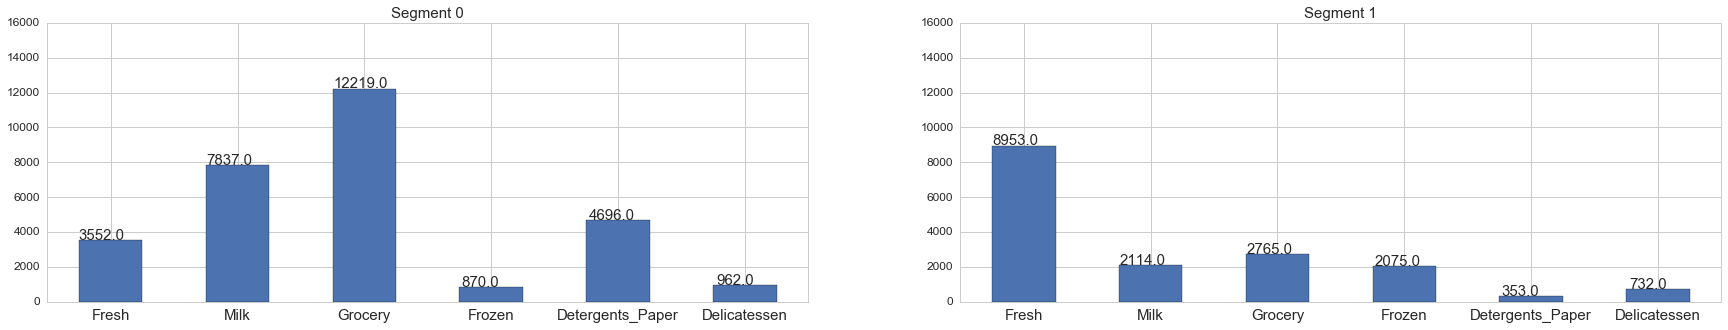

In [74]:
# Representation of the Series above
plt.subplots(figsize=(30,5))    

mean_values = data.describe().loc['mean']

plt.subplot(121)
ax = true_centers.iloc[0].plot.bar()
plt.title(true_centers.iloc[0].name,fontsize=15)
plt.ylim(0,16000)
plt.xticks(rotation=0,fontsize=15)
plt.yticks(fontsize=12)

for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() * 1.005, patch.get_height() * 1.005),fontsize=15)

plt.subplot(122)
ax = true_centers.iloc[1].plot.bar()
plt.title(true_centers.iloc[1].name,fontsize=15)
plt.ylim(0,16000)
plt.xticks(rotation=0,fontsize=15)
plt.yticks(fontsize=12)

for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() * 1.005, patch.get_height() * 1.005),fontsize=15)

plt.show()

In [75]:
# Remembering the statistics of this data set
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [84]:
# Visualizing true centers
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3552.0,7837.0,12219.0,870.0,4696.0,962.0
Segment 1,8953.0,2114.0,2765.0,2075.0,353.0,732.0


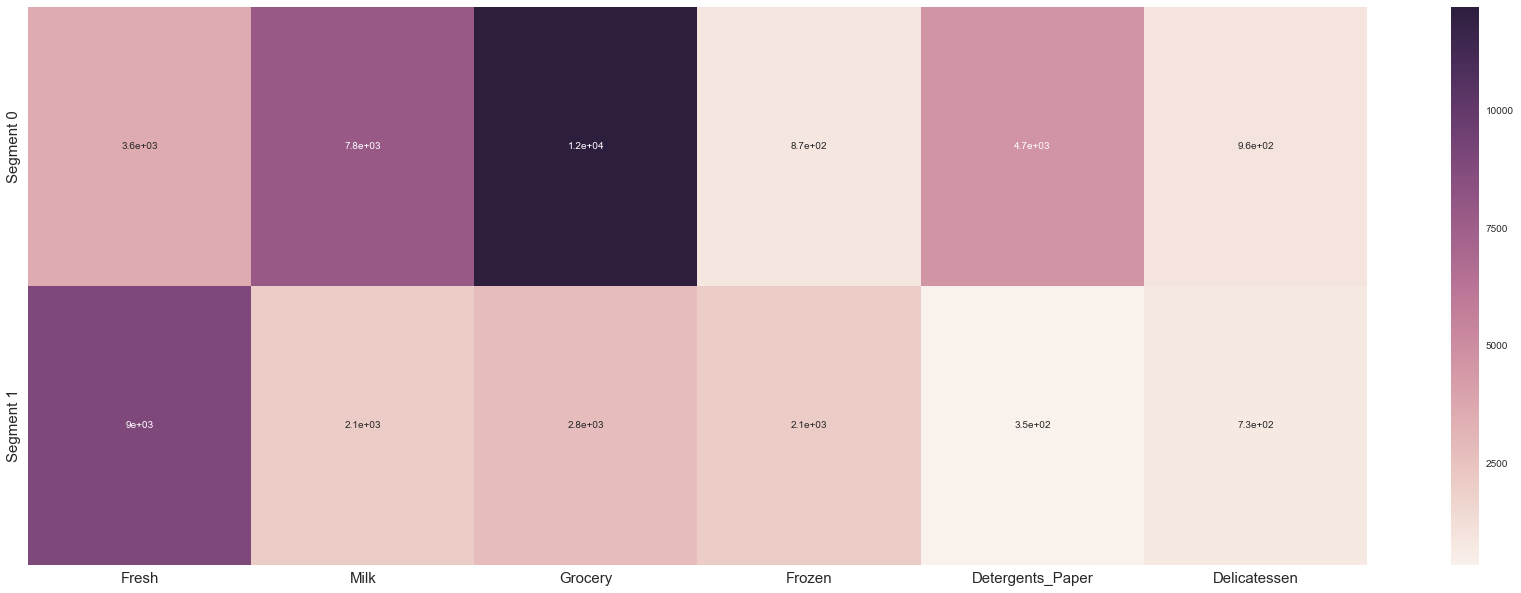

In [85]:
# Checking the true centers using a heatmap, using the same procedure done before

# true centers using quartiles
percentiles_data = 100 * data.rank(pct=True)
percentiles_samples = true_centers

plt.figure(figsize=(30,10))
ax = sns.heatmap(percentiles_samples, annot=True, yticklabels=['Segment 0','Segment 1'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

Answer:


- The customer segment 0 has a high spend on fresh and frozen food, with both values above the median. This segment could represent a restaurant. The heatmap above shows that the segment 0 is characterized by customers with high spend on fresh food;

- The customer segment 1 has a high spend on milk, grocery and detergent_paper, all of them above the median, although the spend for fresh, frozen and deli are below the median. I believe this segment represent resellers, like retailers and grocery stores. The heatmap shows that the segment 1 is characterized by the comsumption of these three features: milk, grocery and detergent_paper.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [86]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print ("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


In [87]:
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5963,3648,6192,425,1716,750
1,21632,1318,2886,266,918,405
2,140,8847,3823,142,1062,3


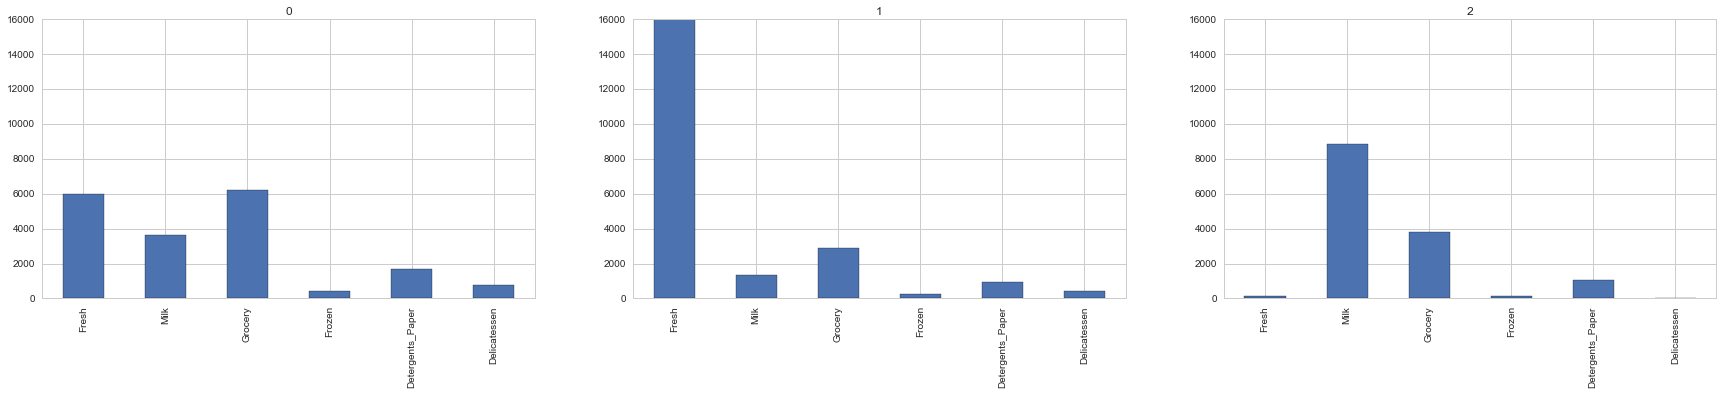

In [88]:
plt.subplots(figsize=(30,5))    

plt.subplot(131)
ax = samples.iloc[0].plot.bar()
plt.title(samples.iloc[0].name)
plt.ylim(0,16000)

plt.subplot(132)
samples.iloc[1].plot.bar()
plt.title(samples.iloc[1].name)
plt.ylim(0,16000)

plt.subplot(133) 
samples.iloc[2].plot.bar()
plt.title(samples.iloc[2].name)
plt.ylim(0,16000)

plt.show()

#### For each sample point, which customer segment from **Question 8** best represents it? 

Sample point 0 - High spend on Milk, Grocery and Detergent papers (and a high spend on fresh food, comparing to the others). This sample point belongs to segment 1.

Sample point 1 - high spend on fresh food, much greater than the median. This sample point belongs to segment 0. 

Sample point 2 - High spend on Milk, Grocery and Detergent papers (and a high spend on fresh food, comparing to the others). This sample point belongs to segment 1.

#### Are the predictions for each sample point consistent with this?

Yes, the predictions for each sample are consistent with the results above.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

#### How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?

The A/B test compares two versions of a solution and assess which one performs better. In the context of this project, the wholesale distributor should perform an A/B using A version as the 5 days a week delivery, while the B version as the 3 days a week delivery in order to assess the reaction of the customers. In this context, the wholesale distributor can use the customer segments to identify the business the customers are in. Changing the delivery service from 5 days a week to 3 days a week will impact the business of customers in need of fresh food (restaurants, hotels, etcs), thus I believe the <i>segment 0</i>, which was identified by GMM algorithm, will not react positively to this change in delivery service. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

#### How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

With the knowledge of the defined customers' segments from the unsupervised approach, the wholesale distributor can train a supervised learning algorithm (k-NN, SVM, Decision Tree..) using the labeled examples as training set, with the customers' segments as target variables.

##### Suggested by reviewer

One can assess how good was the clustering, using the segments as the prediction of the GMM algorithm.

In [94]:
# Suggested by reviewer
# Reading the correct labels
channel_labels = pd.read_csv('customers.csv')['Channel']

In [95]:
# Removing the outliers defined by the project
channel_labels = channel_labels.drop(channel_labels.index[repeated_index]).reset_index(drop = True)

In [96]:
# Score assessment 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(channel_labels,preds)

print('Accuracy of clustering model: {}'.format(accuracy))

Accuracy of clustering model: 0.6114942528735632


We can check the accuracy of other models for comparison. Using a Simple Decision Tree and k-NN Algorithms to compare the scores

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(good_data, channel_labels,test_size=0.2, random_state=0)

In [104]:
# k-NN w/ k = 5 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Classifiers and fit
DTC = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
KNN = KNeighborsClassifier().fit(X_train,y_train)

# Predictions
dtc_preds = DTC.predict(X_test)
knn_preds = KNN.predict(X_test)

# Scores
acc_dtc = accuracy_score(dtc_preds,y_test)
knn_dtc = accuracy_score(knn_preds,y_test)

print('Accuracy scores:\n\t . {:.2f} for DecisionTreeClassifier\n\t . {:.2f} for k-NN classifier with K=5'.format(acc_dtc,knn_dtc))

Scores:
	 . 0.91 for DecisionTreeClassifier
	 . 0.89 for k-NN classifier with K=5


Summing up

|    Algorithm                |    Accuracy   | 
| --------------------------- |:-------------:|
| Clustering method           | 0.61          |
| Decision Tree Classifier    | 0.91          |
| k-NN Classifier             | 0.89          |


This comparison is only for comparison between the clustering accuracy and accuracy we could get from a supervised classifier. We have a better accuracy using simple supervised learning algorithms, even without tuning the hyperparameters!

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

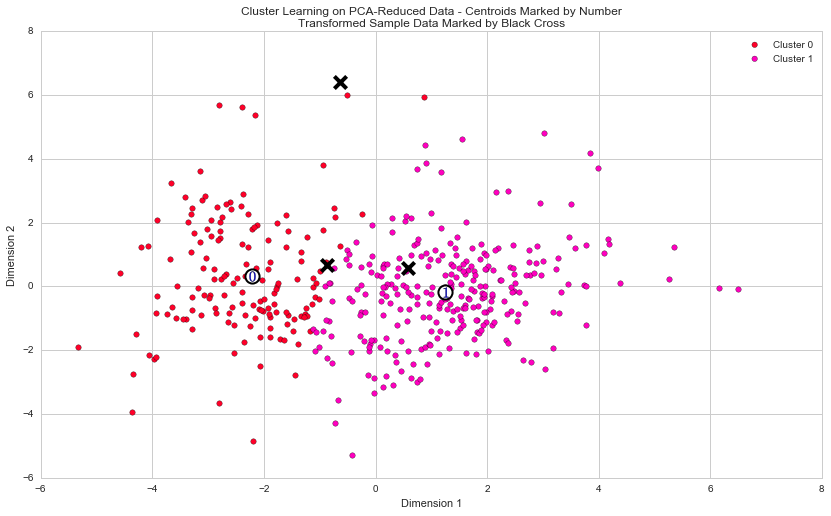

In [105]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

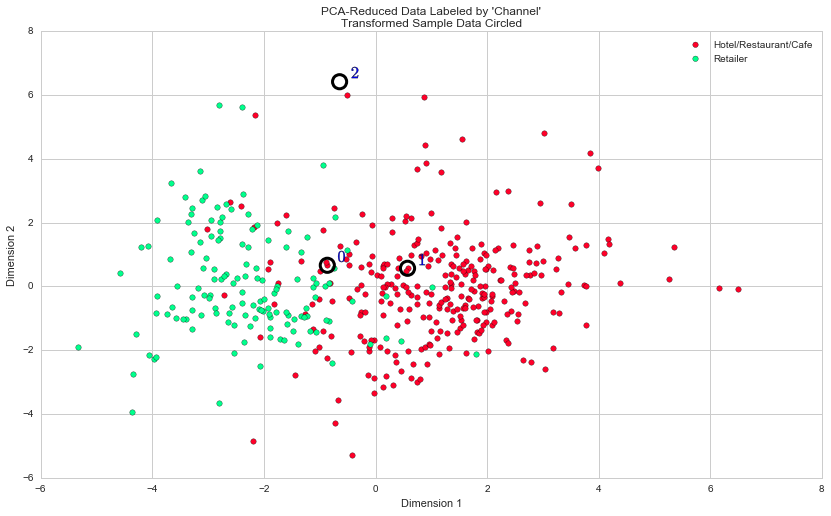

In [106]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data,repeated_index, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

### How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers?

The clustering algorithm and the number of clusters chosen by analyzing the silhouette score worked well, as we compare the two plots above. 

### Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
Yes, comparing the plots above, the majority of points agreed with the clustering made by GMM. The customers with DIM1 lower than -3 are considered purely retails, meanwhile customers with DIM 1 greater than 2 are considered purely HoReCa customers. The interval DIM1 [-3,2] is a fuzzy area where we have misclassifications, as expected by the GMM algorithm.

### Would you consider these classifications as consistent with your previous definition of the customer segments?
Yes, even though there are examples misclassified as <i>retailers</i>, the overall performance of the algorithm is consistent with my previous definition of the segments. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.